# **LOGISTIC REGRESSION: TELECOM CHURN CASE STUDY**
**A telecom company is losing customers to its competitors. With the historical custimer churn information that they have, they want a ML Model to predict which of their present customers may churn**
We have decided to create a *Logistic Regression* model to solve the problem. The logistic regression model will be expected to output a **Churn Probability** for every data under test.
the input data is spread over 3 separate files. **churn_data_csv, cust_data.csv and internet_data.csv**

The Data includes the following:
- Personal Data (gender, children, whether senior citizen, dependents.......)
- services related (Tenure with the provider, payment method, internet packs purchased, special offers....)
- Charges being incurred (Amount of recharge done per month...)

In [1]:
##Import libraries
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
import statsmodels.api as smd
from sklearn.linear_model import LogisticRegression
import scipy.stats as st
import sklearn
from sklearn.metrics import confusion_matrix
import matplotlib.mlab as mlab
import matplotlib.pyplot as plt
import seaborn as sns

## import the three input datasets

In [2]:
##importing the churn data
churn_data = pd.read_csv('churn_data.csv')
churn_data.head()

,customerID,tenure,PhoneService,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,1,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,34,Yes,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,2,Yes,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,45,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,2,Yes,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [3]:
##importing the customer data
cust_data = pd.read_csv('customer_data.csv')
cust_data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents
0,7590-VHVEG,Female,0,Yes,No
1,5575-GNVDE,Male,0,No,No
2,3668-QPYBK,Male,0,No,No
3,7795-CFOCW,Male,0,No,No
4,9237-HQITU,Female,0,No,No


In [4]:
##importing the internrt data
internet_data = pd.read_csv('internet_data.csv')
internet_data.head()

,customerID,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies
0,7590-VHVEG,No phone service,DSL,No,Yes,No,No,No,No
1,5575-GNVDE,No,DSL,Yes,No,Yes,No,No,No
2,3668-QPYBK,No,DSL,Yes,Yes,No,No,No,No
3,7795-CFOCW,No phone service,DSL,Yes,No,Yes,Yes,No,No
4,9237-HQITU,No,Fiber optic,No,No,No,No,No,No


In [5]:
##merging the input dataset into one based on customer ID
df_1 = pd.merge(churn_data, cust_data, how='inner', on='customerID')
df_1.head()

,customerID,tenure,PhoneService,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,gender,SeniorCitizen,Partner,Dependents
0,7590-VHVEG,1,No,Month-to-month,Yes,Electronic check,29.85,29.85,No,Female,0,Yes,No
1,5575-GNVDE,34,Yes,One year,No,Mailed check,56.95,1889.5,No,Male,0,No,No
2,3668-QPYBK,2,Yes,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,Male,0,No,No
3,7795-CFOCW,45,No,One year,No,Bank transfer (automatic),42.30,1840.75,No,Male,0,No,No
4,9237-HQITU,2,Yes,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,Female,0,No,No


In [6]:
##final merge with df_1 and internet data
telecom = pd.merge(df_1, internet_data, how='inner', on='customerID')
telecom.head()

,customerID,tenure,PhoneService,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,gender,...,Partner,Dependents,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies
0,7590-VHVEG,1,No,Month-to-month,Yes,Electronic check,29.85,29.85,No,Female,...,Yes,No,No phone service,DSL,No,Yes,No,No,No,No
1,5575-GNVDE,34,Yes,One year,No,Mailed check,56.95,1889.5,No,Male,...,No,No,No,DSL,Yes,No,Yes,No,No,No
2,3668-QPYBK,2,Yes,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,Male,...,No,No,No,DSL,Yes,Yes,No,No,No,No
3,7795-CFOCW,45,No,One year,No,Bank transfer (automatic),42.30,1840.75,No,Male,...,No,No,No phone service,DSL,Yes,No,Yes,Yes,No,No
4,9237-HQITU,2,Yes,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,Female,...,No,No,No,Fiber optic,No,No,No,No,No,No


In [7]:
##investigating the data
telecom.describe()

,tenure,MonthlyCharges,SeniorCitizen
count,7042.000000,7042.000000,7042.000000
mean,32.366373,64.755886,0.162170
std,24.557955,30.088238,0.368633
min,0.000000,18.250000,0.000000
25%,9.000000,35.500000,0.000000
50%,29.000000,70.350000,0.000000
75%,55.000000,89.850000,0.000000
max,72.000000,118.750000,1.000000


In [8]:
##investigating the data
telecom.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7042 entries, 0 to 7041
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7042 non-null   object 
 1   tenure            7042 non-null   int64  
 2   PhoneService      7042 non-null   object 
 3   Contract          7042 non-null   object 
 4   PaperlessBilling  7042 non-null   object 
 5   PaymentMethod     7042 non-null   object 
 6   MonthlyCharges    7042 non-null   float64
 7   TotalCharges      7042 non-null   object 
 8   Churn             7042 non-null   object 
 9   gender            7042 non-null   object 
 10  SeniorCitizen     7042 non-null   int64  
 11  Partner           7042 non-null   object 
 12  Dependents        7042 non-null   object 
 13  MultipleLines     7042 non-null   object 
 14  InternetService   7042 non-null   object 
 15  OnlineSecurity    7042 non-null   object 
 16  OnlineBackup      7042 non-null   object 


In [9]:
telecom.columns

Index(['customerID', 'tenure', 'PhoneService', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn', 'gender',
       'SeniorCitizen', 'Partner', 'Dependents', 'MultipleLines',
       'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies'],
      dtype='object')

## Data Preprocessing

In [10]:
telecom['TotalCharges'] = telecom['TotalCharges'].replace(' ', np.nan)
telecom['TotalCharges'] = pd.to_numeric(telecom['TotalCharges'])

In [11]:
##total charges will be related to monthly charges.
##we will impute Total Charges multiplied by median of the ratio of Total Charges to monthly charges
##thus for the total charge, where we have an np.nan values we will calculate the total charges as a multiple of the
##monthly charges by the tenure.

In [12]:
value = telecom['MonthlyCharges'] * telecom['tenure']

In [13]:
telecom['TotalCharges'] = value.where(telecom['TotalCharges']==np.nan, other=telecom['TotalCharges'])

In [14]:
telecom['TotalCharges']

0         29.85
1       1889.50
2        108.15
3       1840.75
4        151.65
         ...   
7037    1419.40
7038    1990.50
7039    7362.90
7040     346.45
7041     306.60
Name: TotalCharges, Length: 7042, dtype: float64

### Exploratory Data Analysis
This will comprise of Univariate and multivariate analysis along with abundant visualizations

(array([2709., 1228.,  671.,  508.,  454.,  412.,  395.,  309.,  223.,
         122.]),
 array([  18.8,  885.4, 1752. , 2618.6, 3485.2, 4351.8, 5218.4, 6085. ,
        6951.6, 7818.2, 8684.8]),
 <BarContainer object of 10 artists>)

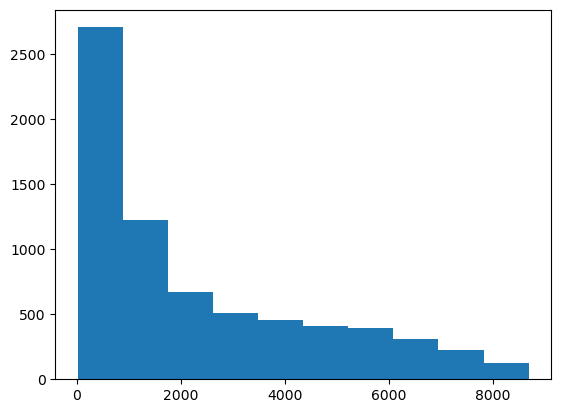

In [15]:
#distribution of total charges of field
plt.hist(telecom['TotalCharges'])

In [16]:
##a lot of people are spending less than approximately 1000 bucks with the service provider,
##only few people spend more thsn 6000 bucks

#### churn split in terms of count

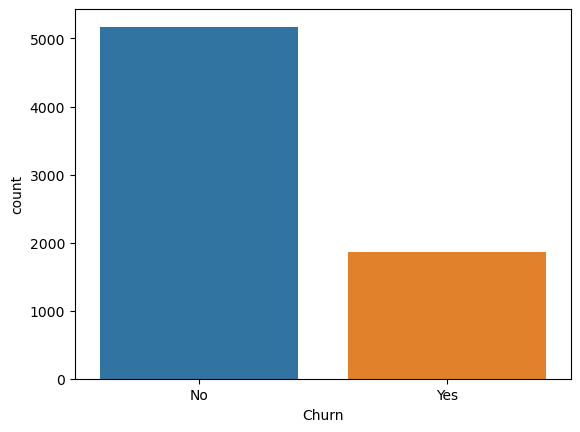

In [17]:
##display the counts of churns in the entire data. this provides an indication whether the data is unbalanced
plt1 = sns.countplot(x=telecom['Churn'], hue=telecom['Churn'])

#### Tenure

In [18]:
## the time for which a customer has been using the service.

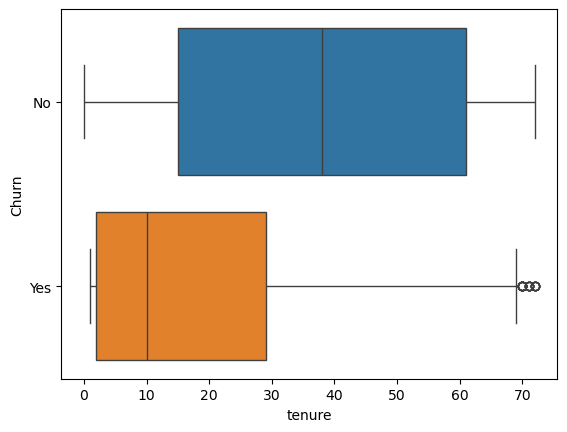

In [19]:
sns.boxplot(x='tenure', y='Churn', data=telecom, hue='Churn')
plt.show()

In [20]:
##customers with more tenure tends to churn less. there is a tendency of customers to churn at a very early stage as the median
##for churned customers is around 10 years

#### Finding which kind of contracts the churn probability is more

In [21]:
pie_contract_m2m = pd.DataFrame(telecom[telecom['Contract']=='Month-to-month']['Churn'].value_counts())

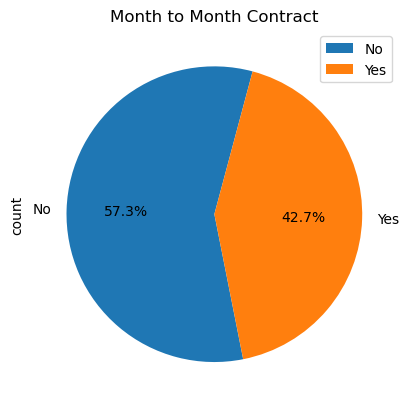

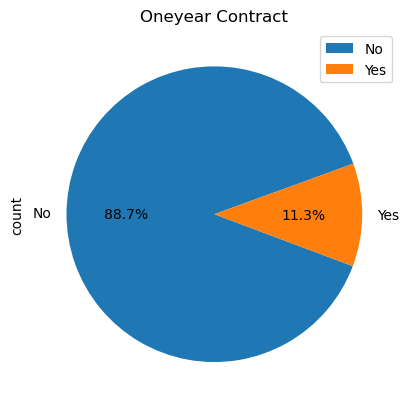

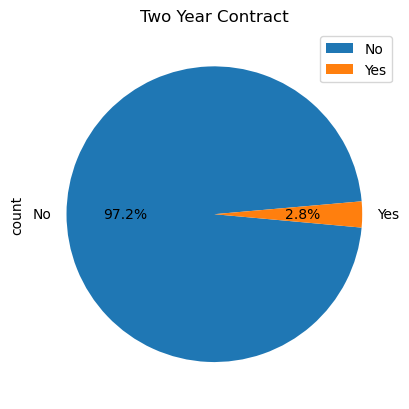

In [22]:
pie_contract_m2m.plot.pie(subplots=True, labels=pie_contract_m2m.index.values, autopct="%1.1F%%", startangle=75)
plt.title('Month to Month Contract')
plt.gca().set_aspect('equal')

pie_contract_1y = pd.DataFrame(telecom[telecom['Contract']=='One year']['Churn'].value_counts())
pie_contract_1y.plot.pie(subplots=True, labels=pie_contract_1y.index.values, autopct="%1.1F%%", startangle=20)
plt.title('Oneyear Contract')
plt.gca().set_aspect('equal')

pie_contract_2y = pd.DataFrame(telecom[telecom['Contract']=='Two year']['Churn'].value_counts())
pie_contract_2y.plot.pie(subplots=True, labels=pie_contract_2y.index.values, autopct="%1.1F%%", startangle=5)
plt.title('Two Year Contract')
plt.gca().set_aspect('equal')

In [23]:
##customers with one year and two year contracts tend to churn a lot lesser than month to momth contract holders

#### whether being on monthly charges is influencing Churn

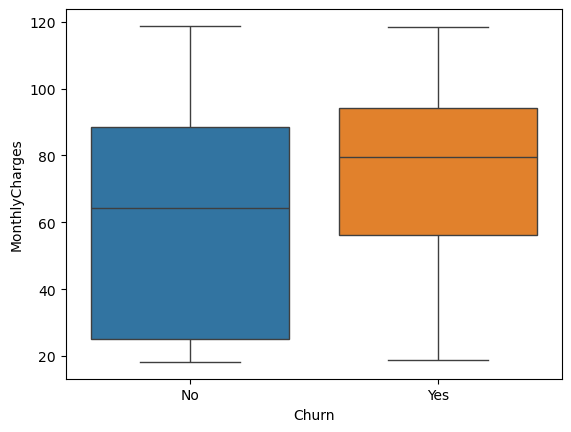

In [24]:
sns.boxplot(x='Churn', y='MonthlyCharges', data=telecom, hue='Churn')
plt.show()

In [25]:
#median monthly charges are higher for customers who have churned

#### whether totalcharges amount has influence on churn

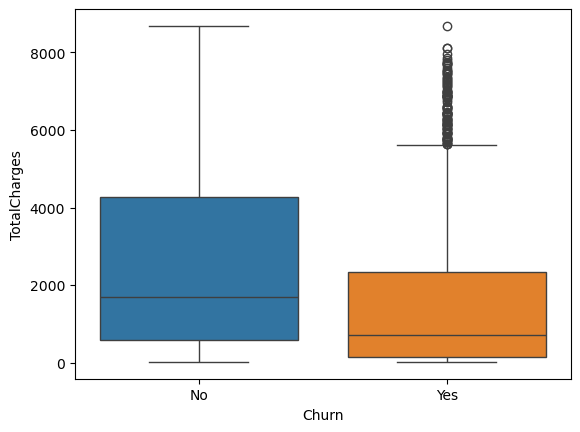

In [26]:
sns.boxplot(x='Churn', y='TotalCharges', data=telecom, hue='Churn')
plt.show()

In [27]:
##this shows a median for the no churn cases to be higher than that of the churn cases. this could be due to the fact that
##the tenure for non churn customers is higher than that of those that have churned

#### whether having multiple internet connectivity has influence on churn

In [28]:
##whether a customer has multiple lines of internet connectivity

Text(0.5, 1.0, 'No-Multiple Lines(Single Line)')

<Figure size 1500x500 with 0 Axes>

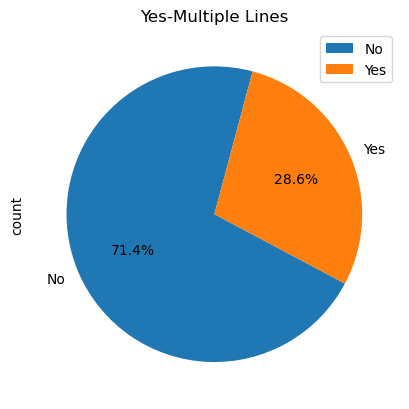

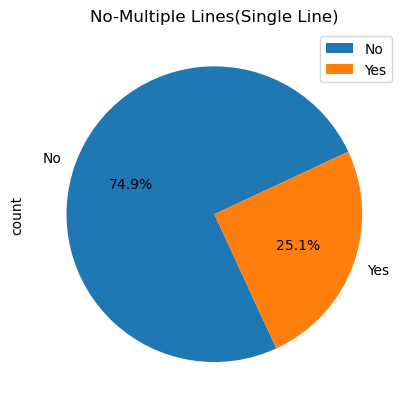

In [29]:
plt.figure(figsize=(15,5))
pie_multiplelines_y = pd.DataFrame(telecom[telecom['MultipleLines']=='Yes']['Churn'].value_counts())
pie_multiplelines_y.plot.pie(labels = pie_multiplelines_y.index.values, autopct = "%1.1f%%", startangle=75, subplots=True)
plt.title('Yes-Multiple Lines')

pie_multiplelines_n = pd.DataFrame(telecom[telecom['MultipleLines']=='No']['Churn'].value_counts())
pie_multiplelines_n.plot.pie(subplots=True, labels = pie_multiplelines_n.index.values, autopct = "%1.1f%%", startangle=25)
plt.title('No-Multiple Lines(Single Line)')


In [30]:
#multiple lines of internent connetivity does not affect churn that much

#### whether type of internet service has influence on Churn

In [31]:
pie_internetservice_fo = pd.DataFrame(telecom[telecom['InternetService']=='Fiber optic']['Churn'].value_counts())
pie_internetservice_fo

,count
Churn,
No,1798
Yes,1297


Text(0.5, 1.0, 'NoInternet Service')

<Figure size 1500x500 with 0 Axes>

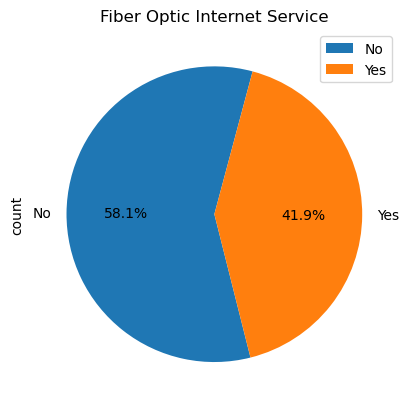

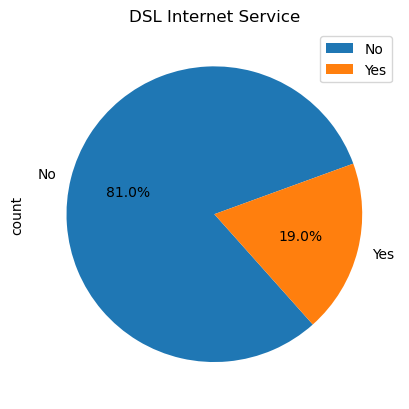

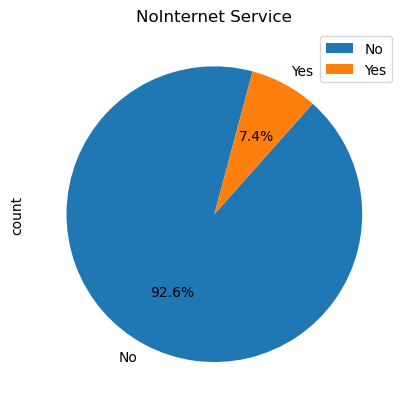

In [32]:
plt.figure(figsize=(15,5))
pie_internetservice_fo = pd.DataFrame(telecom[telecom['InternetService']=='Fiber optic']['Churn'].value_counts())
pie_internetservice_fo.plot.pie(subplots=True, labels=pie_internetservice_fo.index.values, autopct='%1.1f%%', startangle=75)
plt.title('Fiber Optic Internet Service')
plt.gca().set_aspect('equal')

pie_internetservice_dsl = pd.DataFrame(telecom[telecom['InternetService']=='DSL']['Churn'].value_counts())
pie_internetservice_dsl.plot.pie(subplots=True, labels=pie_internetservice_dsl.index.values, autopct='%1.1f%%', startangle=20)
plt.title('DSL Internet Service')

pie_internetservice_no = pd.DataFrame(telecom[telecom['InternetService']=='No']['Churn'].value_counts())
pie_internetservice_no.plot.pie(subplots=True, labels=pie_internetservice_no.index.values, autopct='%1.1f%%', startangle=75)
plt.title('NoInternet Service')


In [33]:
##people on fiber optic lines churn more

#### Data Pre-processing

#### converting binary categorical features (yes/no) to 0/1

In [34]:
##list of varibale to map
varlist = ['PhoneService','PaperlessBilling','Churn','Partner','Dependents']
##defining the map function
def binary_map(x):
    return x.map({'Yes':1, 'No':0})
##applying the function to the housing list
telecom[varlist] = telecom[varlist].apply(binary_map)

In [35]:
telecom.head(20)

,customerID,tenure,PhoneService,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,gender,...,Partner,Dependents,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies
0,7590-VHVEG,1,0,Month-to-month,1,Electronic check,29.85,29.85,0,Female,...,1,0,No phone service,DSL,No,Yes,No,No,No,No
1,5575-GNVDE,34,1,One year,0,Mailed check,56.95,1889.50,0,Male,...,0,0,No,DSL,Yes,No,Yes,No,No,No
2,3668-QPYBK,2,1,Month-to-month,1,Mailed check,53.85,108.15,1,Male,...,0,0,No,DSL,Yes,Yes,No,No,No,No
3,7795-CFOCW,45,0,One year,0,Bank transfer (automatic),42.30,1840.75,0,Male,...,0,0,No phone service,DSL,Yes,No,Yes,Yes,No,No
4,9237-HQITU,2,1,Month-to-month,1,Electronic check,70.70,151.65,1,Female,...,0,0,No,Fiber optic,No,No,No,No,No,No
5,9305-CDSKC,8,1,Month-to-month,1,Electronic check,99.65,820.50,1,Female,...,0,0,Yes,Fiber optic,No,No,Yes,No,Yes,Yes
6,1452-KIOVK,22,1,Month-to-month,1,Credit card (automatic),89.10,1949.40,0,Male,...,0,1,Yes,Fiber optic,No,Yes,No,No,Yes,No
7,6713-OKOMC,10,0,Month-to-month,0,Mailed check,29.75,301.90,0,Female,...,0,0,No phone service,DSL,Yes,No,No,No,No,No
8,7892-POOKP,28,1,Month-to-month,1,Electronic check,104.80,3046.05,1,Female,...,1,0,Yes,Fiber optic,No,No,Yes,Yes,Yes,Yes
9,6388-TABGU,62,1,One year,0,Bank transfer (automatic),56.15,3487.95,0,Male,...,0,1,No,DSL,Yes,Yes,No,No,No,No


### for nominsl categorical features with multiple possible values, createing dummy variable(one-hot encoding)

In [36]:
telecom.columns

Index(['customerID', 'tenure', 'PhoneService', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn', 'gender',
       'SeniorCitizen', 'Partner', 'Dependents', 'MultipleLines',
       'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies'],
      dtype='object')

In [37]:
print(telecom['OnlineSecurity'].unique())
print(telecom['OnlineBackup'].unique())
print(telecom['DeviceProtection'].unique())
print(telecom['TechSupport'].unique())
print(telecom['StreamingTV'].unique())
print(telecom['StreamingMovies'].unique())

['No' 'Yes' 'No internet service']
['Yes' 'No' 'No internet service']
['No' 'Yes' 'No internet service']
['No' 'Yes' 'No internet service']
['No' 'Yes' 'No internet service']
['No' 'Yes' 'No internet service']


In [38]:
##creatinng a dummy vatrible for some of the categorical variables and dropping thr first one
dummy1 = pd.get_dummies(telecom[['Contract','PaymentMethod','gender','InternetService','MultipleLines','OnlineSecurity',
                                 'OnlineBackup', 'DeviceProtection',
                                 'TechSupport', 'StreamingTV', 'StreamingMovies']], dtype=int, drop_first=True)
dummy1

,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,gender_Male,InternetService_Fiber optic,InternetService_No,MultipleLines_No phone service,MultipleLines_Yes,...,OnlineBackup_No internet service,OnlineBackup_Yes,DeviceProtection_No internet service,DeviceProtection_Yes,TechSupport_No internet service,TechSupport_Yes,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes
0,0,0,0,1,0,0,0,0,1,0,...,0,1,0,0,0,0,0,0,0,0
1,1,0,0,0,1,1,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
2,0,0,0,0,1,1,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
3,1,0,0,0,0,1,0,0,1,0,...,0,0,0,1,0,1,0,0,0,0
4,0,0,0,1,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7037,0,1,0,0,0,0,0,1,0,0,...,1,0,1,0,1,0,1,0,1,0
7038,1,0,0,0,1,1,0,0,0,1,...,0,0,0,1,0,1,0,1,0,1
7039,1,0,1,0,0,0,1,0,0,1,...,0,1,0,1,0,0,0,1,0,1
7040,0,0,0,1,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0


In [39]:
##creating a new dataframe by concatenating and dropping the original variables
telecom = pd.concat([telecom, dummy1], axis=1)
telecom

,customerID,tenure,PhoneService,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,gender,...,OnlineBackup_No internet service,OnlineBackup_Yes,DeviceProtection_No internet service,DeviceProtection_Yes,TechSupport_No internet service,TechSupport_Yes,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes
0,7590-VHVEG,1,0,Month-to-month,1,Electronic check,29.85,29.85,0,Female,...,0,1,0,0,0,0,0,0,0,0
1,5575-GNVDE,34,1,One year,0,Mailed check,56.95,1889.50,0,Male,...,0,0,0,1,0,0,0,0,0,0
2,3668-QPYBK,2,1,Month-to-month,1,Mailed check,53.85,108.15,1,Male,...,0,1,0,0,0,0,0,0,0,0
3,7795-CFOCW,45,0,One year,0,Bank transfer (automatic),42.30,1840.75,0,Male,...,0,0,0,1,0,1,0,0,0,0
4,9237-HQITU,2,1,Month-to-month,1,Electronic check,70.70,151.65,1,Female,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7037,2569-WGERO,72,1,Two year,1,Bank transfer (automatic),21.15,1419.40,0,Female,...,1,0,1,0,1,0,1,0,1,0
7038,6840-RESVB,24,1,One year,1,Mailed check,84.80,1990.50,0,Male,...,0,0,0,1,0,1,0,1,0,1
7039,2234-XADUH,72,1,One year,1,Credit card (automatic),103.20,7362.90,0,Female,...,0,1,0,1,0,0,0,1,0,1
7040,4801-JZAZL,11,0,Month-to-month,1,Electronic check,29.60,346.45,0,Female,...,0,0,0,0,0,0,0,0,0,0


In [40]:
##expected increase in column number
telecom.columns

Index(['customerID', 'tenure', 'PhoneService', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn', 'gender',
       'SeniorCitizen', 'Partner', 'Dependents', 'MultipleLines',
       'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract_One year',
       'Contract_Two year', 'PaymentMethod_Credit card (automatic)',
       'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check',
       'gender_Male', 'InternetService_Fiber optic', 'InternetService_No',
       'MultipleLines_No phone service', 'MultipleLines_Yes',
       'OnlineSecurity_No internet service', 'OnlineSecurity_Yes',
       'OnlineBackup_No internet service', 'OnlineBackup_Yes',
       'DeviceProtection_No internet service', 'DeviceProtection_Yes',
       'TechSupport_No internet service', 'TechSupport_Yes',
       'StreamingTV_No internet service', 'StreamingTV_Yes',
       'StreamingMovi

In [41]:
##dropping original columns
telecom = telecom.drop(['Contract','PaymentMethod','gender','InternetService','MultipleLines','OnlineSecurity',
                                 'OnlineBackup', 'DeviceProtection',
                                 'TechSupport', 'StreamingTV', 'StreamingMovies'], axis=1)
telecom

,customerID,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,SeniorCitizen,Partner,Dependents,...,OnlineBackup_No internet service,OnlineBackup_Yes,DeviceProtection_No internet service,DeviceProtection_Yes,TechSupport_No internet service,TechSupport_Yes,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes
0,7590-VHVEG,1,0,1,29.85,29.85,0,0,1,0,...,0,1,0,0,0,0,0,0,0,0
1,5575-GNVDE,34,1,0,56.95,1889.50,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
2,3668-QPYBK,2,1,1,53.85,108.15,1,0,0,0,...,0,1,0,0,0,0,0,0,0,0
3,7795-CFOCW,45,0,0,42.30,1840.75,0,0,0,0,...,0,0,0,1,0,1,0,0,0,0
4,9237-HQITU,2,1,1,70.70,151.65,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7037,2569-WGERO,72,1,1,21.15,1419.40,0,0,0,0,...,1,0,1,0,1,0,1,0,1,0
7038,6840-RESVB,24,1,1,84.80,1990.50,0,0,1,1,...,0,0,0,1,0,1,0,1,0,1
7039,2234-XADUH,72,1,1,103.20,7362.90,0,0,1,1,...,0,1,0,1,0,0,0,1,0,1
7040,4801-JZAZL,11,0,1,29.60,346.45,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0


In [42]:
telecom.columns

Index(['customerID', 'tenure', 'PhoneService', 'PaperlessBilling',
       'MonthlyCharges', 'TotalCharges', 'Churn', 'SeniorCitizen', 'Partner',
       'Dependents', 'Contract_One year', 'Contract_Two year',
       'PaymentMethod_Credit card (automatic)',
       'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check',
       'gender_Male', 'InternetService_Fiber optic', 'InternetService_No',
       'MultipleLines_No phone service', 'MultipleLines_Yes',
       'OnlineSecurity_No internet service', 'OnlineSecurity_Yes',
       'OnlineBackup_No internet service', 'OnlineBackup_Yes',
       'DeviceProtection_No internet service', 'DeviceProtection_Yes',
       'TechSupport_No internet service', 'TechSupport_Yes',
       'StreamingTV_No internet service', 'StreamingTV_Yes',
       'StreamingMovies_No internet service', 'StreamingMovies_Yes'],
      dtype='object')

In [43]:
telecom.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7042 entries, 0 to 7041
Data columns (total 32 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   customerID                             7042 non-null   object 
 1   tenure                                 7042 non-null   int64  
 2   PhoneService                           7042 non-null   int64  
 3   PaperlessBilling                       7042 non-null   int64  
 4   MonthlyCharges                         7042 non-null   float64
 5   TotalCharges                           7031 non-null   float64
 6   Churn                                  7042 non-null   int64  
 7   SeniorCitizen                          7042 non-null   int64  
 8   Partner                                7042 non-null   int64  
 9   Dependents                             7042 non-null   int64  
 10  Contract_One year                      7042 non-null   int32  
 11  Cont

In [44]:
telecom[telecom.duplicated()]

,customerID,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,SeniorCitizen,Partner,Dependents,...,OnlineBackup_No internet service,OnlineBackup_Yes,DeviceProtection_No internet service,DeviceProtection_Yes,TechSupport_No internet service,TechSupport_Yes,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes


In [45]:
telecom.TotalCharges.isnull().sum()

11

In [46]:
telecom = telecom.dropna(subset=['TotalCharges'])

In [47]:
telecom.isnull().sum()

customerID                               0
tenure                                   0
PhoneService                             0
PaperlessBilling                         0
MonthlyCharges                           0
TotalCharges                             0
Churn                                    0
SeniorCitizen                            0
Partner                                  0
Dependents                               0
Contract_One year                        0
Contract_Two year                        0
PaymentMethod_Credit card (automatic)    0
PaymentMethod_Electronic check           0
PaymentMethod_Mailed check               0
gender_Male                              0
InternetService_Fiber optic              0
InternetService_No                       0
MultipleLines_No phone service           0
MultipleLines_Yes                        0
OnlineSecurity_No internet service       0
OnlineSecurity_Yes                       0
OnlineBackup_No internet service         0
OnlineBacku

In [48]:
##checking the percentage of misssing values after removing the missing values
round((telecom.isnull().sum()/telecom.notnull().sum()+telecom.isnull().sum()),2)

customerID                               0.0
tenure                                   0.0
PhoneService                             0.0
PaperlessBilling                         0.0
MonthlyCharges                           0.0
TotalCharges                             0.0
Churn                                    0.0
SeniorCitizen                            0.0
Partner                                  0.0
Dependents                               0.0
Contract_One year                        0.0
Contract_Two year                        0.0
PaymentMethod_Credit card (automatic)    0.0
PaymentMethod_Electronic check           0.0
PaymentMethod_Mailed check               0.0
gender_Male                              0.0
InternetService_Fiber optic              0.0
InternetService_No                       0.0
MultipleLines_No phone service           0.0
MultipleLines_Yes                        0.0
OnlineSecurity_No internet service       0.0
OnlineSecurity_Yes                       0.0
OnlineBack

### Train-Test Split of Input DataSet

In [49]:
from sklearn.model_selection import train_test_split

In [50]:
##Putting feature variables into X
X = telecom.drop(['customerID'], axis=1)
y = X.pop('Churn')

In [51]:
##splitting data into train and test
X_train,X_test,y_train,y_test = train_test_split(X,y, train_size=0.7, test_size=0.3, random_state=100)

### Feature Scaling

In [52]:
from sklearn.preprocessing import StandardScaler

In [53]:
X_train['TotalCharges']

879     1665.20
5789     475.20
5008     116.85
880     1043.30
2784     396.30
         ...   
79      1216.60
3934     411.45
5964    3024.15
6947    6770.50
5649     669.45
Name: TotalCharges, Length: 4921, dtype: float64

In [54]:
scaler = StandardScaler()
X_train[['tenure','MonthlyCharges','TotalCharges']] = scaler.fit_transform(X_train[['tenure','MonthlyCharges','TotalCharges']])
X_train.head(10)

,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,SeniorCitizen,Partner,Dependents,Contract_One year,Contract_Two year,...,OnlineBackup_No internet service,OnlineBackup_Yes,DeviceProtection_No internet service,DeviceProtection_Yes,TechSupport_No internet service,TechSupport_Yes,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes
879,0.032381,1,1,-0.333459,-0.269045,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
5789,-0.293230,1,0,-1.491062,-0.793442,0,0,0,0,1,...,1,0,1,0,1,0,1,0,1,0
5008,-1.066555,1,0,-1.496045,-0.951355,0,0,0,0,1,...,1,0,1,0,1,0,1,0,1,0
880,-0.903749,1,1,1.508408,-0.543097,0,0,0,0,0,...,0,1,0,1,0,1,0,1,0,1
2784,-1.147957,1,1,1.109808,-0.828210,0,0,1,0,0,...,0,0,0,1,0,1,0,1,0,1
3873,0.765004,0,0,-1.012741,-0.217575,0,1,1,0,1,...,0,0,0,0,0,1,0,0,0,0
5386,-0.903749,1,1,-0.627427,-0.810628,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6622,-1.229360,1,0,-0.087655,-0.950716,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4464,-0.822347,1,0,0.565053,-0.624489,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
5278,0.968511,1,1,1.491800,1.620456,0,1,1,0,0,...,0,0,0,1,0,1,0,1,0,1


### Finding the correlation among features

In [55]:
##checking for correlation with the corr method within the features
cor = telecom.corr(numeric_only=True)
cor

,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,SeniorCitizen,Partner,Dependents,Contract_One year,...,OnlineBackup_No internet service,OnlineBackup_Yes,DeviceProtection_No internet service,DeviceProtection_Yes,TechSupport_No internet service,TechSupport_Yes,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes
tenure,1.000000,0.007815,0.004663,0.246663,0.825837,-0.353989,0.015771,0.382176,0.163540,0.202469,...,-0.037432,0.361341,-0.037432,0.361348,-0.037432,0.325084,-0.037432,0.280087,-0.037432,0.285228
PhoneService,0.007815,1.000000,0.016658,0.248004,0.112948,0.011720,0.008412,0.018443,-0.001047,-0.003118,...,0.171846,-0.052102,0.171846,-0.070150,0.171846,-0.095229,0.171846,-0.021444,0.171846,-0.033540
PaperlessBilling,0.004663,0.016658,1.000000,0.351834,0.157646,0.191540,0.156319,-0.013844,-0.110062,-0.052221,...,-0.320552,0.127153,-0.320552,0.103935,-0.320552,0.037360,-0.320552,0.224128,-0.320552,0.211469
MonthlyCharges,0.246663,0.248004,0.351834,1.000000,0.650949,0.193005,0.219991,0.098031,-0.112235,0.004910,...,-0.763205,0.441744,-0.763205,0.482469,-0.763205,0.338102,-0.763205,0.629578,-0.763205,0.627145
TotalCharges,0.825837,0.112948,0.157646,0.650949,1.000000,-0.199374,0.102568,0.319462,0.064861,0.170769,...,-0.374843,0.510474,-0.374843,0.522708,-0.374843,0.432621,-0.374843,0.515554,-0.374843,0.519715
Churn,-0.353989,0.011720,0.191540,0.193005,-0.199374,1.000000,0.150509,-0.150078,-0.163193,-0.178277,...,-0.227633,-0.082374,-0.227633,-0.066085,-0.227633,-0.164615,-0.227633,0.063371,-0.227633,0.060976
SeniorCitizen,0.015771,0.008412,0.156319,0.219991,0.102568,0.150509,1.000000,0.016897,-0.210600,-0.046524,...,-0.182558,0.066621,-0.182558,0.059609,-0.182558,-0.060490,-0.182558,0.105538,-0.182558,0.119936
Partner,0.382176,0.018443,-0.013844,0.098031,0.319462,-0.150078,0.016897,1.000000,0.452223,0.083003,...,-0.000358,0.141764,-0.000358,0.153777,-0.000358,0.120450,-0.000358,0.124679,-0.000358,0.118302
Dependents,0.163540,-0.001047,-0.110062,-0.112235,0.064861,-0.163193,-0.210600,0.452223,1.000000,0.069178,...,0.138341,0.023573,0.138341,0.014030,0.138341,0.063211,0.138341,-0.016384,0.138341,-0.038264
Contract_One year,0.202469,-0.003118,-0.052221,0.004910,0.170769,-0.178277,-0.046524,0.083003,0.069178,1.000000,...,0.038024,0.084065,0.038024,0.103028,0.038024,0.096391,0.038024,0.062031,0.038024,0.064880


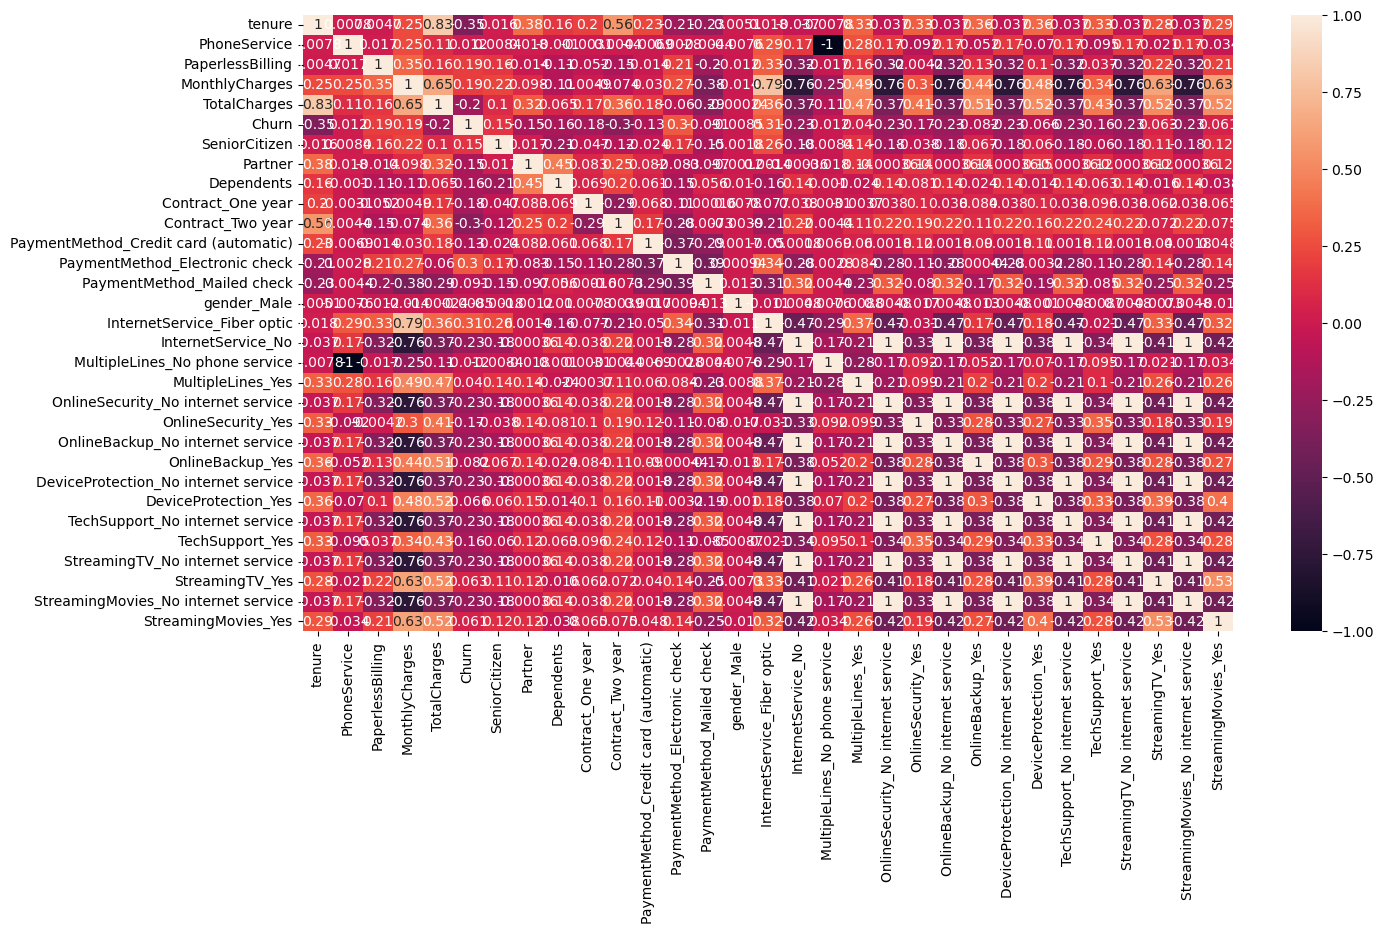

In [56]:
plt.figure(figsize=(15,8))
sns.heatmap(cor, annot=True)
plt.tick_params(axis='x',rotation=90)

In [57]:
##collecting features from the cor matrix that have a high correlation
correlated_features = set()
for i in range(len(cor.columns)):
    for j in range(i):
        if abs(cor.iloc[i,j]) > 0.7:
            colname = cor.columns[i]
            colname1 = cor.columns[j]
            print(abs(cor.iloc[i,j]), '---',j,'---',i,'---',colname1,'---',colname)
            correlated_features.add(colname)
            correlated_features.add(colname1)

0.8258366487064654 --- 0 --- 4 --- tenure --- TotalCharges
0.7871514742715182 --- 3 --- 15 --- MonthlyCharges --- InternetService_Fiber optic
0.7632046925843156 --- 3 --- 16 --- MonthlyCharges --- InternetService_No
1.0000000000000002 --- 1 --- 17 --- PhoneService --- MultipleLines_No phone service
0.7632046925843156 --- 3 --- 19 --- MonthlyCharges --- OnlineSecurity_No internet service
1.0 --- 16 --- 19 --- InternetService_No --- OnlineSecurity_No internet service
0.7632046925843156 --- 3 --- 21 --- MonthlyCharges --- OnlineBackup_No internet service
1.0 --- 16 --- 21 --- InternetService_No --- OnlineBackup_No internet service
1.0 --- 19 --- 21 --- OnlineSecurity_No internet service --- OnlineBackup_No internet service
0.7632046925843156 --- 3 --- 23 --- MonthlyCharges --- DeviceProtection_No internet service
1.0 --- 16 --- 23 --- InternetService_No --- DeviceProtection_No internet service
1.0 --- 19 --- 23 --- OnlineSecurity_No internet service --- DeviceProtection_No internet servic

#### Dropping highly correlated dummy variables

In [58]:
def drop_highly_correlated_features(df, threshold=0.70):
    corr_matrix = df.corr().abs()
    upper = corr_matrix.where(
        np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))
    to_drop = [column for column in upper.columns if any(upper[column] > threshold)]
    reduced_df = pd.DataFrame(df.drop(columns=to_drop))
    return reduced_df, to_drop

In [59]:
df_cleaned, df_dropped = drop_highly_correlated_features(telecom.drop('customerID',axis=1))

In [64]:
df_dropped

['TotalCharges',
 'InternetService_Fiber optic',
 'InternetService_No',
 'MultipleLines_No phone service',
 'OnlineSecurity_No internet service',
 'OnlineBackup_No internet service',
 'DeviceProtection_No internet service',
 'TechSupport_No internet service',
 'StreamingTV_No internet service',
 'StreamingMovies_No internet service']

In [65]:
X_train = X_train.drop(['TotalCharges',
 'InternetService_Fiber optic',
 'InternetService_No',
 'MultipleLines_No phone service',
 'OnlineSecurity_No internet service',
 'OnlineBackup_No internet service',
 'DeviceProtection_No internet service',
 'TechSupport_No internet service',
 'StreamingTV_No internet service',
 'StreamingMovies_No internet service'], axis=1)
X_train

,tenure,PhoneService,PaperlessBilling,MonthlyCharges,SeniorCitizen,Partner,Dependents,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,gender_Male,MultipleLines_Yes,OnlineSecurity_Yes,OnlineBackup_Yes,DeviceProtection_Yes,TechSupport_Yes,StreamingTV_Yes,StreamingMovies_Yes
879,0.032381,1,1,-0.333459,0,0,0,0,0,0,0,0,1,1,0,1,0,0,0,0
5789,-0.293230,1,0,-1.491062,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0
5008,-1.066555,1,0,-1.496045,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0
880,-0.903749,1,1,1.508408,0,0,0,0,0,0,1,0,1,0,1,1,1,1,1,1
2784,-1.147957,1,1,1.109808,0,0,1,0,0,0,0,0,0,0,0,0,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
79,0.520796,1,1,-1.288440,0,1,1,1,0,1,0,0,0,1,0,0,0,0,0,0
3934,-0.903749,0,0,-0.811780,0,0,1,1,0,0,0,1,0,0,1,1,0,1,0,0
5964,0.683602,1,0,-0.097620,0,1,1,0,0,0,0,0,0,0,1,0,1,1,0,0
6947,1.456927,1,1,1.207797,0,1,1,1,0,1,0,0,1,1,0,1,0,0,1,1


In [66]:
X_test = X_test.drop(['TotalCharges',
 'InternetService_Fiber optic',
 'InternetService_No',
 'MultipleLines_No phone service',
 'OnlineSecurity_No internet service',
 'OnlineBackup_No internet service',
 'DeviceProtection_No internet service',
 'TechSupport_No internet service',
 'StreamingTV_No internet service',
 'StreamingMovies_No internet service'], axis=1)
X_test

,tenure,PhoneService,PaperlessBilling,MonthlyCharges,SeniorCitizen,Partner,Dependents,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,gender_Male,MultipleLines_Yes,OnlineSecurity_Yes,OnlineBackup_Yes,DeviceProtection_Yes,TechSupport_Yes,StreamingTV_Yes,StreamingMovies_Yes
942,24,1,1,79.85,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1
3729,62,1,1,20.05,0,0,0,0,1,1,0,0,1,0,0,0,0,0,0,0
1761,58,1,1,24.45,0,0,0,0,1,1,0,0,1,1,0,0,0,0,0,0
2283,1,1,1,71.55,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0
1872,41,1,0,19.70,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1289,63,1,0,68.80,0,0,0,1,0,0,0,0,1,1,1,1,1,1,0,0
6347,15,1,1,68.60,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0
6403,72,1,1,116.60,0,1,1,0,1,0,0,0,1,1,1,1,1,1,1,1
3597,25,1,1,95.70,0,1,0,0,0,1,0,0,1,0,0,0,0,1,1,1


In [86]:
##check if both x_train and x_test data are the same
X_test.columns == X_train.columns

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True])

In [87]:
X_train.corr().abs()

,tenure,PhoneService,PaperlessBilling,MonthlyCharges,SeniorCitizen,Partner,Dependents,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,gender_Male,MultipleLines_Yes,OnlineSecurity_Yes,OnlineBackup_Yes,DeviceProtection_Yes,TechSupport_Yes,StreamingTV_Yes,StreamingMovies_Yes
tenure,1.000000,0.004975,0.010068,0.262414,0.024343,0.379972,0.166143,0.196165,0.570321,0.235957,0.210740,0.239931,0.025929,0.335056,0.344295,0.361811,0.361700,0.334154,0.291393,0.297205
PhoneService,0.004975,1.000000,0.016144,0.242126,0.004345,0.007927,0.007292,0.007564,0.009168,0.010941,0.001711,0.002246,0.008524,0.277981,0.099330,0.060406,0.067422,0.107309,0.022088,0.046126
PaperlessBilling,0.010068,0.016144,1.000000,0.347964,0.167185,0.017390,0.108544,0.053936,0.148847,0.013985,0.224282,0.212217,0.020122,0.168417,0.006401,0.128462,0.100382,0.040745,0.205893,0.206677
MonthlyCharges,0.262414,0.242126,0.347964,1.000000,0.216016,0.104337,0.111673,0.004313,0.059776,0.049959,0.264544,0.384389,0.008535,0.493359,0.309745,0.447045,0.478989,0.342761,0.627841,0.624139
SeniorCitizen,0.024343,0.004345,0.167185,0.216016,1.000000,0.017004,0.200788,0.057028,0.110310,0.020113,0.166955,0.154599,0.010854,0.153124,0.042720,0.069106,0.055877,0.056347,0.105605,0.109812
Partner,0.379972,0.007927,0.017390,0.104337,0.017004,1.000000,0.445294,0.080863,0.241887,0.079970,0.079924,0.097555,0.012927,0.132830,0.137240,0.144153,0.159357,0.121728,0.124074,0.122131
Dependents,0.166143,0.007292,0.108544,0.111673,0.200788,0.445294,1.000000,0.063191,0.201719,0.053400,0.150313,0.058895,0.004326,0.031062,0.081045,0.019816,0.017875,0.067750,0.023308,0.036173
Contract_One year,0.196165,0.007564,0.053936,0.004313,0.057028,0.080863,0.063191,1.000000,0.286136,0.063553,0.103699,0.007663,0.013953,0.001182,0.102745,0.086846,0.097908,0.109728,0.050628,0.060380
Contract_Two year,0.570321,0.009168,0.148847,0.059776,0.110310,0.241887,0.201719,0.286136,1.000000,0.178677,0.280862,0.005248,0.009815,0.103010,0.206743,0.115991,0.170942,0.237538,0.086041,0.087311
PaymentMethod_Credit card (automatic),0.235957,0.010941,0.013985,0.049959,0.020113,0.079970,0.053400,0.063553,0.178677,1.000000,0.374503,0.284953,0.008673,0.074315,0.117661,0.097909,0.125138,0.113194,0.055472,0.067748


<Axes: >

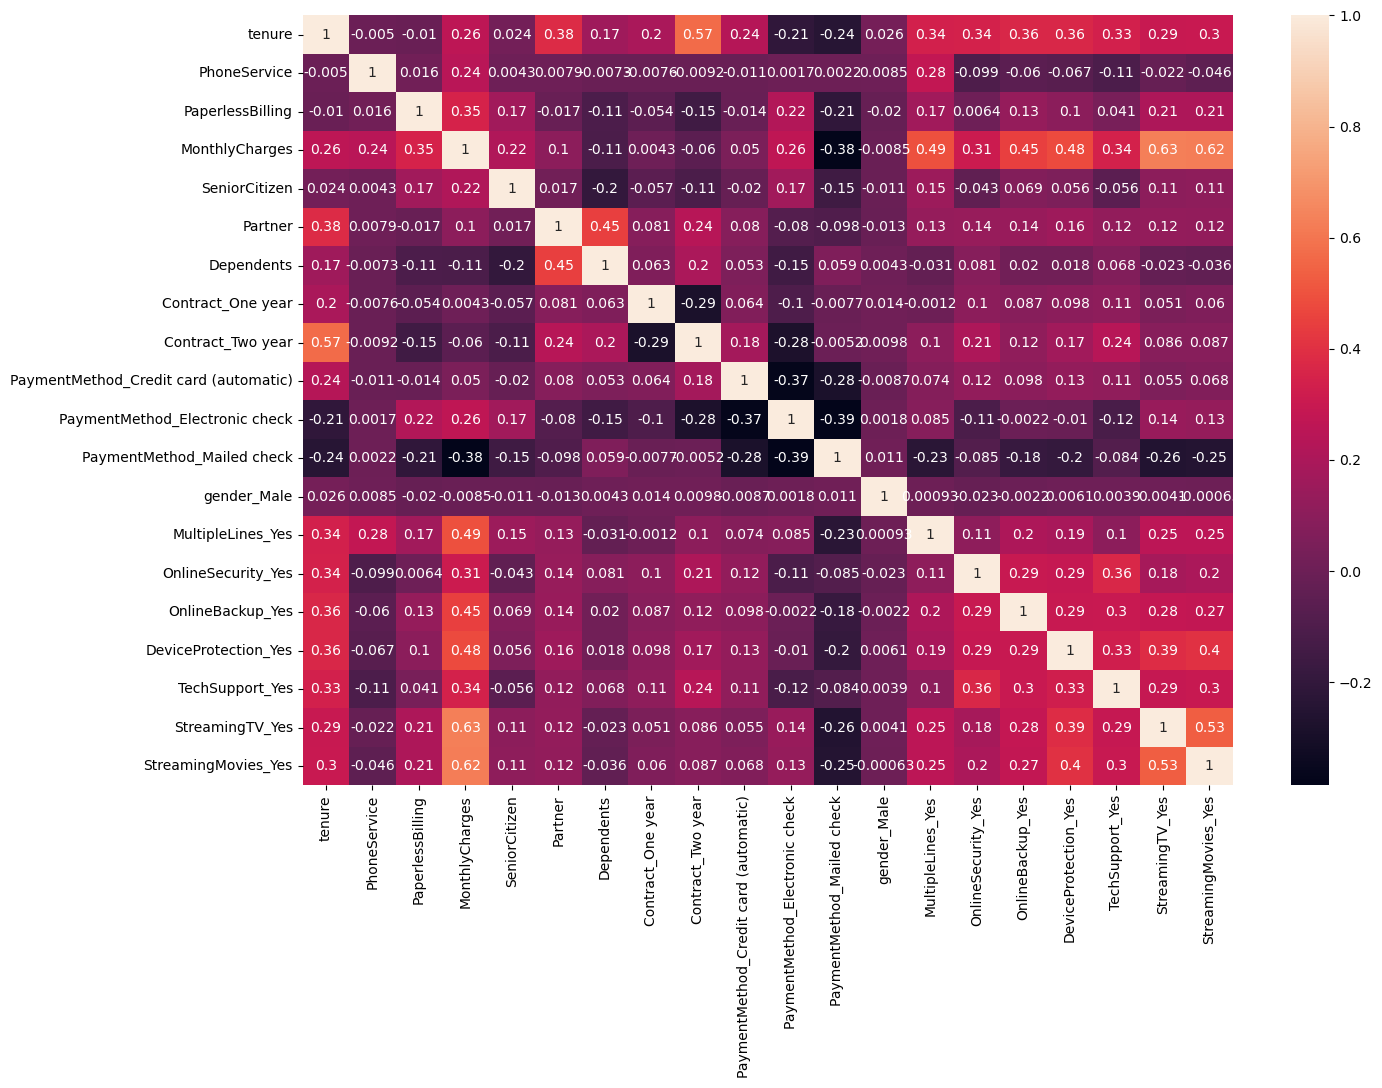

In [72]:
##plotting a heatmap of the X_train features correlation after dropping
plt.figure(figsize=(15,10))
sns.heatmap(X_train.corr(),annot=True)

In [ ]:
##we can see that none of none of the features are highly correlated

### Crrating a Logistic Regression Model

In [73]:
from statsmodels.tools import add_constant as add_constant

In [75]:
X_train_constant = add_constant(X_train)
X_train_constant.head(10)

,const,tenure,PhoneService,PaperlessBilling,MonthlyCharges,SeniorCitizen,Partner,Dependents,Contract_One year,Contract_Two year,...,PaymentMethod_Electronic check,PaymentMethod_Mailed check,gender_Male,MultipleLines_Yes,OnlineSecurity_Yes,OnlineBackup_Yes,DeviceProtection_Yes,TechSupport_Yes,StreamingTV_Yes,StreamingMovies_Yes
879,1.0,0.032381,1,1,-0.333459,0,0,0,0,0,...,0,0,1,1,0,1,0,0,0,0
5789,1.0,-0.293230,1,0,-1.491062,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
5008,1.0,-1.066555,1,0,-1.496045,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
880,1.0,-0.903749,1,1,1.508408,0,0,0,0,0,...,1,0,1,0,1,1,1,1,1,1
2784,1.0,-1.147957,1,1,1.109808,0,0,1,0,0,...,0,0,0,0,0,0,1,1,1,1
3873,1.0,0.765004,0,0,-1.012741,0,1,1,0,1,...,0,0,0,0,1,0,0,1,0,0
5386,1.0,-0.903749,1,1,-0.627427,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
6622,1.0,-1.229360,1,0,-0.087655,0,0,0,0,0,...,0,0,1,1,0,0,0,0,0,1
4464,1.0,-0.822347,1,0,0.565053,0,0,0,0,0,...,0,0,1,0,1,0,1,0,0,0
5278,1.0,0.968511,1,1,1.491800,0,1,1,0,0,...,0,1,0,1,1,0,1,1,1,1


In [82]:
##building the logistic regression model
def build_model(y,X):
    lr = smd.Logit(y,X).fit()
    print(lr.summary())
    return lr

model1 = build_model(y_train, X_train_constant)

#### Feature Selection: Drop Features with P-Value>0.05

In [91]:
drop_cols = ['Partner','Dependents','PaymentMethod_Credit card (automatic)','PaymentMethod_Mailed check',
             'gender_Male','MultipleLines_Yes','DeviceProtection_Yes','StreamingTV_Yes','StreamingMovies_Yes']


In [92]:
X_train_const = X_train_constant.copy(deep=True)

In [93]:
X_train_const.drop(drop_cols, axis=1, inplace=True)

#### Recreating the model

In [94]:
model2 = build_model(y_train, X_train_const)

Optimization terminated successfully.
         Current function value: 0.414592
         Iterations 8
                           Logit Regression Results                           
Dep. Variable:                  Churn   No. Observations:                 4921
Model:                          Logit   Df Residuals:                     4909
Method:                           MLE   Df Model:                           11
Date:                Thu, 19 Jun 2025   Pseudo R-squ.:                  0.2817
Time:                        17:18:08   Log-Likelihood:                -2040.2
converged:                       True   LL-Null:                       -2840.3
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                     coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const                             -0.2284      0.178     -1.286     

### Now that we Optimized our model using the statsmodel logit() function, we will create a corresponding model using sklearn Logistic Regression().
#### Some differences between Logit and Logistic Regression
- Scikit learn logistic regression:uses L2 regularization by default, but regularization can be turned off using penalty='none'. Statsmodel does not use regularization by default.
- Scikitlearn logistic regression: includes intercept by default. statsmodel logit: use the **add_constant()** methof to include the intercept.

In [96]:
##using scikit learn's logistic regression classifier
model_variables = ['tenure','PhoneService','PaperlessBilling','MonthlyCharges','SeniorCitizen','Contract_One year',
              'Contract_Two year','PaymentMethod_Electronic check','OnlineSecurity_Yes','OnlineBackup_Yes','TechSupport_Yes']

In [98]:
X_train1 = X_train_const[model_variables]
X_train1

,tenure,PhoneService,PaperlessBilling,MonthlyCharges,SeniorCitizen,Contract_One year,Contract_Two year,PaymentMethod_Electronic check,OnlineSecurity_Yes,OnlineBackup_Yes,TechSupport_Yes
879,0.032381,1,1,-0.333459,0,0,0,0,0,1,0
5789,-0.293230,1,0,-1.491062,0,0,1,0,0,0,0
5008,-1.066555,1,0,-1.496045,0,0,1,0,0,0,0
880,-0.903749,1,1,1.508408,0,0,0,1,1,1,1
2784,-1.147957,1,1,1.109808,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...
79,0.520796,1,1,-1.288440,0,1,0,0,0,0,0
3934,-0.903749,0,0,-0.811780,0,1,0,0,1,1,1
5964,0.683602,1,0,-0.097620,0,0,0,0,1,0,1
6947,1.456927,1,1,1.207797,0,1,0,0,0,1,0


In [99]:
###initializing the classifier
logreg = LogisticRegression()
logreg.fit(X_train1,y_train)

LogisticRegression()

#### Predciting with the training data

In [100]:
y_train_pred = logreg.predict(X_train1)

In [101]:
sklearn.metrics.accuracy_score(y_train, y_train_pred)

0.8032920138183296

<Axes: >

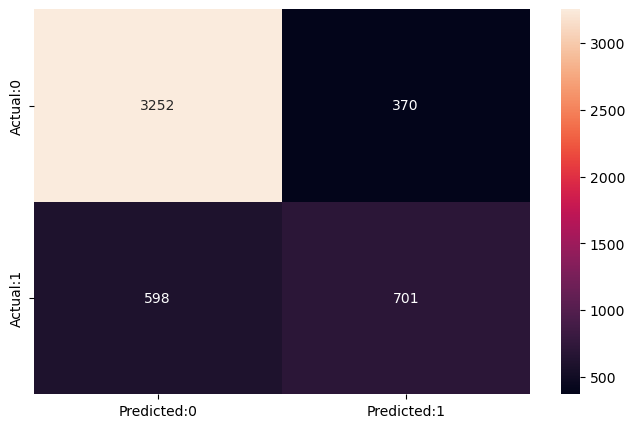

In [107]:
###create the confusion matrix
cm = confusion_matrix(y_train,y_train_pred)
conf_matrix = pd.DataFrame(data=cm, columns=['Predicted:0','Predicted:1'], index=['Actual:0','Actual:1'])
plt.figure(figsize=(8,5))
sns.heatmap(conf_matrix, annot=True, fmt='d')

### other classification statistics

In [108]:
TN=cm[0,0]
TP=cm[1,1]
FN=cm[1,0]
FP=cm[0,1]
sensitivity = TP/float(TP+FN)
specificity = TN/float(TN+FP)

In [121]:
print('Accuracy = ', (TP+TN)/float(TP+TN+FP+FN))
print('Missclassifications=1-Accuracy=', 1-((TP+TN)/float(TP+TN+FP+FN)))
print('Negative likelihood ratio = sensitivity/(1-specificity)= ', sensitivity/(1-specificity))
print('Positive likelihood ratio = (1-sensitivity)/specificity= ', (1-sensitivity)/specificity)
print('Negative predicted value = TN/(TN+FN) =', TN/float(TN+FN))
print('Sensitivity/Recall or True Positive Rate = TP/(TP+FN) = ', TP/(FN+TP))
print('Specificity or True Negative Rate = TN/(TN+FP) =', TN/(TN+FP))

Accuracy =  0.8032920138183296
Missclassifications=1-Accuracy= 0.1967079861816704
Negative likelihood ratio = sensitivity/(1-specificity)=  5.282695628654059
Positive likelihood ratio = (1-sensitivity)/specificity=  0.5127314321642061
Negative predicted value = TN/(TN+FN) = 0.8446753246753247
Sensitivity/Recall or True Positive Rate = TP/(TP+FN) =  0.5396458814472671
Specificity or True Negative Rate = TN/(TN+FP) = 0.8978464936499172


#### Some Pointers from the above classification metrics:
- ##### sensitivity/recall: in the example of Churn prediction, it gives us the percentage of correctly predicted churns from the pool of -Actual churns
- ##### speciifcity: gives us the percentage of correctly predicted non-churns from the pool of Actual non-churns
- ##### Precision: gives us the percentage of correctly predicted churns from the pool of total predicted churns

## Plot the ROC Curve and AUC
###### the ROC (Receiver Operating Characteristic) Curve is an useful tool when prediciting the probability of a binary outcome.
###### It is a plot of the **false positive rate (x-axis)** versus the **true positive rate (y-axis)** for a number of different candidate threshold values (probability) between 0.0 and 1.0. Put another way, it plots the false alarm rate versus the hit rate

#### An ROC curve demonstrates several things:
- ###### It shows the **tradeoff between sensitivity and specificity** (any increase in sensitivity should be accompanied by a decrease in specificity).
- ###### The closer the curve follows the left-hand border and then the top boprder of the ROC space, the more accurate the test (higher AUC).
- ###### The closer the curve comes to the 45-degree diagonal of the ROC space, the less accurate the test.

In [122]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

In [123]:
#predict probabilities
lr_probs = logreg.predict_proba(X_train1)
print(lr_probs)

[[0.82074942 0.17925058]
 [0.97904001 0.02095999]
 [0.96045018 0.03954982]
 ...
 [0.9489939  0.0510061 ]
 [0.87881674 0.12118326]
 [0.93670198 0.06329802]]


In [124]:
##leep probabilities for the positive outcome only
lr_probs = lr_probs[:,1]
lr_probs

array([0.17925058, 0.02095999, 0.03954982, ..., 0.0510061 , 0.12118326,
       0.06329802])

In [129]:
##calculate scores
lr_auc = roc_auc_score(y_train, lr_probs)

In [130]:
#summarize the scores
print('Logistic: ROC AUC = %.3f' % (lr_auc))

Logistic: ROC AUC = 0.847


In [131]:
#calculate the roc curves
lr_fpr, lr_tpr, _ = roc_curve(y_train, lr_probs)

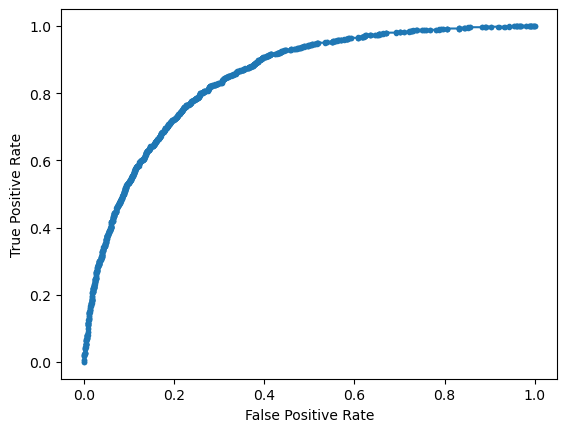

In [134]:
plt.plot(lr_fpr, lr_tpr, marker='.')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()

In [217]:
pd.DataFrame(zip(lr_fpr, lr_tpr,y_train_pred,lr_probs,_), columns=('FPR','TPR','Y_train_pred','Probability_y=1','aaa'))

,FPR,TPR,Y_train_pred,Probability_y=1,aaa
0,0.000000,0.000000,0,0.179251,inf
1,0.000000,0.000770,0,0.020960,0.875827
2,0.000000,0.006159,0,0.039550,0.867397
3,0.000276,0.006159,1,0.587927,0.867150
4,0.000276,0.018476,1,0.659238,0.835689
...,...,...,...,...,...
1407,0.995583,1.000000,0,0.011329,0.004337
1408,0.998343,1.000000,0,0.273566,0.004183
1409,0.998896,1.000000,1,0.659168,0.004163
1410,0.999448,1.000000,0,0.023230,0.004123


### Creating A dataframe with the actual churn flag and the predicted probabilities

In [140]:
y_train_pred_final = pd.DataFrame({'churn':y_train.values, 'Churn_prob':lr_probs})
y_train_pred_final['CustID'] = y_train.index
y_train_pred_final.head(10)

,churn,Churn_prob,CustID
0,0,0.179251,879
1,0,0.020960,5789
2,0,0.039550,5008
3,1,0.587927,880
4,1,0.659238,2784
5,0,0.012686,3873
6,0,0.327924,5386
7,1,0.437147,6622
8,1,0.387288,4464
9,0,0.219602,5278


In [142]:
#finding our optimal prob threshold
y_train_pred_final['predicted'] = y_train_pred_final.Churn_prob.map(lambda x : 1 if x>0.5 else 0)
y_train_pred_final.head(20)

,churn,Churn_prob,CustID,predicted
0,0,0.179251,879,0
1,0,0.020960,5789,0
2,0,0.039550,5008,0
3,1,0.587927,880,1
4,1,0.659238,2784,1
5,0,0.012686,3873,0
6,0,0.327924,5386,0
7,1,0.437147,6622,0
8,1,0.387288,4464,0
9,0,0.219602,5278,0


In [143]:
##manually setting a threshold to find the optimum one that maximizes our accuracy score and hence our maximum likehood 
cm = confusion_matrix(y_train_pred_final.churn, y_train_pred_final.predicted)
cm

array([[3252,  370],
       [ 598,  701]], dtype=int64)

In [145]:
print(sklearn.metrics.accuracy_score(y_train_pred_final.churn, y_train_pred_final.predicted))

0.8032920138183296


#### Is the threshold of 0.5 good? Finding optimal cutoff point

In [168]:
#creating columns with different probability cutoff
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i] = y_train_pred_final.Churn_prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head(20)

,churn,Churn_prob,CustID,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.179251,879,0,1,1,0,0,0,0,0,0,0,0
1,0,0.020960,5789,0,1,0,0,0,0,0,0,0,0,0
2,0,0.039550,5008,0,1,0,0,0,0,0,0,0,0,0
3,1,0.587927,880,1,1,1,1,1,1,1,0,0,0,0
4,1,0.659238,2784,1,1,1,1,1,1,1,1,0,0,0
5,0,0.012686,3873,0,1,0,0,0,0,0,0,0,0,0
6,0,0.327924,5386,0,1,1,1,1,0,0,0,0,0,0
7,1,0.437147,6622,0,1,1,1,1,1,0,0,0,0,0
8,1,0.387288,4464,0,1,1,1,1,0,0,0,0,0,0
9,0,0.219602,5278,0,1,1,1,0,0,0,0,0,0,0


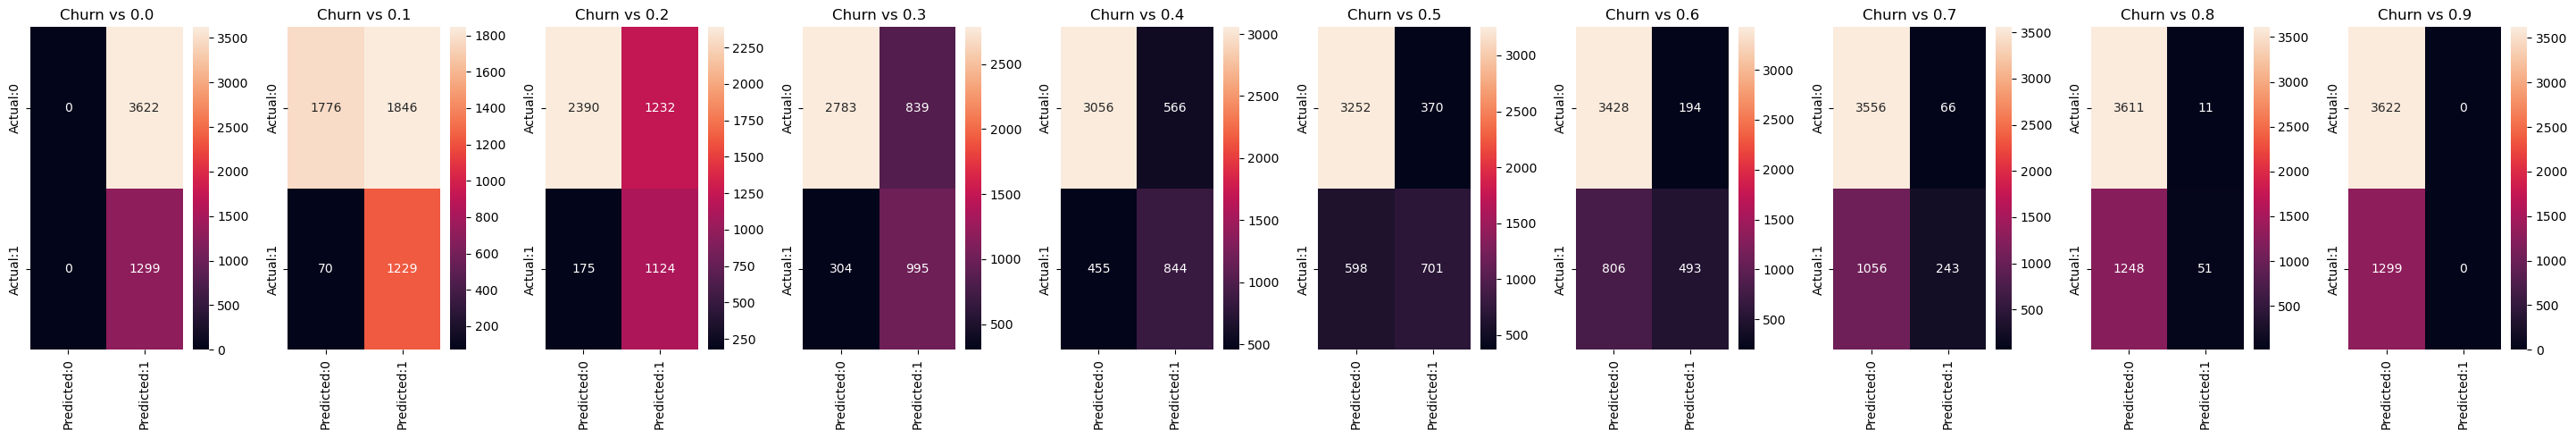

In [179]:
plt.figure(figsize=(29, 5))
for idx,i in enumerate(numbers, start=1):
    plt.subplot(1, len(numbers), idx)
    cm4 = confusion_matrix(y_train_pred_final.churn, y_train_pred_final[i])
    conf_matrix = pd.DataFrame(data=cm4, columns=['Predicted:0','Predicted:1'], index=['Actual:0','Actual:1'])
    sns.heatmap(conf_matrix, annot=True, fmt='d')
    plt.title(f'Churn vs {i}')
plt.tight_layout()
plt.show()

In [150]:
###now we investigate which of the thresholds gives us a higher accuracy, sensitivity and specificity
cutoff_df = pd.DataFrame(columns = ['prob','accuracy','sensi','speci'])
#TN=cm[0,0] #true negatives
#TP=cm[1,1] #true positives
#FN=cm[1,0] #false negatives
#FP=cm[0,1] #false positives

num = numbers
for i in num:
    cm1 = sklearn.metrics.confusion_matrix(y_train_pred_final.churn, y_train_pred_final[i]) #plot a confusion matrix between the threshold classes and the churn classes
    total1 = sum(sum(cm1)) # add all the unique counts of matrix outputs
    accuracy = (cm1[0,0] + cm1[1,1])/total1 #calculates the accuracy of the classification
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,1]+cm1[1,0])
    cutoff_df.loc[i] = [i, accuracy, sensi, speci]
print(cutoff_df)


     prob  accuracy     sensi     speci
0.0   0.0  0.263971  1.000000  0.000000
0.1   0.1  0.610648  0.946112  0.490337
0.2   0.2  0.714083  0.865281  0.659856
0.3   0.3  0.767730  0.765974  0.768360
0.4   0.4  0.792522  0.649731  0.843733
0.5   0.5  0.803292  0.539646  0.897846
0.6   0.6  0.796789  0.379523  0.946438
0.7   0.7  0.771998  0.187067  0.981778
0.8   0.8  0.744158  0.039261  0.996963
0.9   0.9  0.736029  0.000000  1.000000


#### PLot accuacry -sensitivity -specificity against various probabilities.

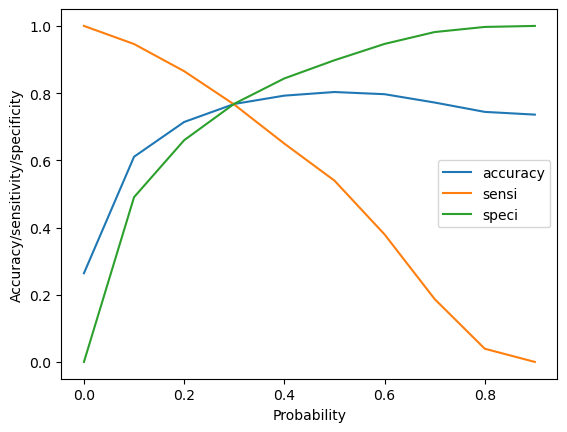

In [151]:
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.xlabel('Probability')
plt.ylabel('Accuracy/sensitivity/specificity')
plt.show()

In [ ]:
###at the point where they intersect could be our optimum value

### we are going to take the 0.3 as our optimum threshold and predict the labels

In [188]:
y_train_pred_final['final_predicted'] = y_train_pred_final.Churn_prob.map(lambda x: 1 if x > 0.3 else 0)
y_train_pred_final

,churn,Churn_prob,CustID,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,0,0.179251,879,0,1,1,0,0,0,0,0,0,0,0,0
1,0,0.020960,5789,0,1,0,0,0,0,0,0,0,0,0,0
2,0,0.039550,5008,0,1,0,0,0,0,0,0,0,0,0,0
3,1,0.587927,880,1,1,1,1,1,1,1,0,0,0,0,1
4,1,0.659238,2784,1,1,1,1,1,1,1,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4916,0,0.034402,79,0,1,0,0,0,0,0,0,0,0,0,0
4917,0,0.085761,3934,0,1,0,0,0,0,0,0,0,0,0,0
4918,0,0.051006,5964,0,1,0,0,0,0,0,0,0,0,0,0
4919,0,0.121183,6947,0,1,1,0,0,0,0,0,0,0,0,0


In [189]:
##checking the overall accuracy 
sklearn.metrics.accuracy_score(y_train_pred_final.churn, y_train_pred_final.final_predicted)

0.7677301361511888

In [190]:
confusion = confusion_matrix(y_train_pred_final.churn, y_train_pred_final.final_predicted)

In [191]:
###calculating the various classification matrix
TP = confusion[1,1]
TN = confusion[0,0]
FP = confusion[0,1]
FN = confusion[1,0]

In [199]:
###sensitvity/true positive rate/recall
sensitivity = TP/(TP+FN)
sensitivity

0.7659738260200154

In [193]:
###specificity/true negative rate
specificity = TN/(TN+FP)
specificity

0.7683600220872446

In [198]:
from sklearn.metrics import classification_report
cp = classification_report(y_train_pred_final.churn, y_train_pred_final.final_predicted)
print(cp)

              precision    recall  f1-score   support

           0       0.90      0.77      0.83      3622
           1       0.54      0.77      0.64      1299

    accuracy                           0.77      4921
   macro avg       0.72      0.77      0.73      4921
weighted avg       0.81      0.77      0.78      4921



### using sklearn utils for the same

In [200]:
from sklearn.metrics import precision_score, recall_score
precision_score(y_train_pred_final.churn, y_train_pred_final.final_predicted)

0.5425299890948746

In [201]:
recall_score(y_train_pred_final.churn, y_train_pred_final.final_predicted)

0.7659738260200154

#### Precision and recall tradeoff
##### to find out the tradeoff between precision and recall we invoke the precision_recall curve

In [202]:
from sklearn.metrics import precision_recall_curve

In [203]:
pd.DataFrame(zip(y_train_pred_final.churn, y_train_pred_final.final_predicted))

,0,1
0,0,0
1,0,0
2,0,0
3,1,1
4,1,1
...,...,...
4916,0,0
4917,0,0
4918,0,0
4919,0,0


In [213]:
p, r, thresholds = precision_recall_curve(y_train_pred_final.churn, y_train_pred_final.Churn_prob)
print(p,r)

[0.26397074 0.26407806 0.26413176 ... 1.         1.         1.        ] [1.00000000e+00 1.00000000e+00 1.00000000e+00 ... 1.53964588e-03
 7.69822941e-04 0.00000000e+00]


In [207]:
pd.DataFrame(zip(p,r, thresholds), columns=['Precision','Recall','Threshold_probs'])

,Precision,Recall,Threshold_probs
0,0.263971,1.000000,0.004109
1,0.264078,1.000000,0.004123
2,0.264132,1.000000,0.004143
3,0.264185,1.000000,0.004163
4,0.264293,1.000000,0.004183
...,...,...,...
4792,1.000000,0.003849,0.868717
4793,1.000000,0.003079,0.870238
4794,1.000000,0.002309,0.871264
4795,1.000000,0.001540,0.871882


#### pLotting the precision-recall curve
- **Precsion** is a ratio of the number of true positives divided by the sum of the true positives and false positives. It describes how good a model is at predicting the positive class. Precision is referred to as the **positive predictive value**
- **Recall** is calculated as the ratio of the number of true positives divided by the sum of true positives and false negatives. Recall is the same as sensitvity.

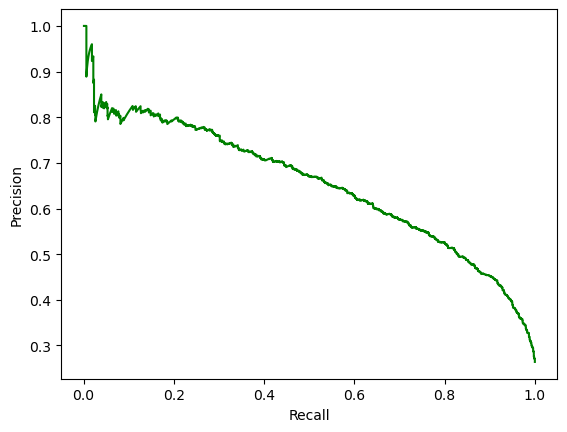

In [215]:
plt.plot(r[:-1], p[:-1], 'g-')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.show()

Text(0, 0.5, 'Precision(Green)/Recall(Red)')

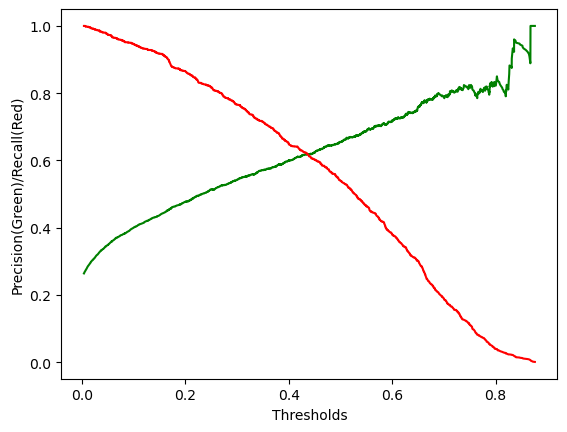

In [216]:
###cplotting the precision and recall on the threshold probability
plt.plot(thresholds, p[:-1], 'g-')
plt.plot(thresholds, r[:-1], 'r-')
plt.xlabel('Thresholds')
plt.ylabel('Precision(Green)/Recall(Red)')

### When to use ROC vs Precision-Recall Curve
- **ROC curves** should be used when thre are roughly equal numbers of observations for each class
- **Precision-Recall curves** should be used when there is a moderate to large class imbalance

### >>> at this point we update our threshold and recalculate

In [218]:
y_train_pred_final['pred_final'] = y_train_pred_final.Churn_prob.map(lambda x : 1 if x>0.42 else 0)
y_train_pred_final

,churn,Churn_prob,CustID,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted,pred_final
0,0,0.179251,879,0,1,1,0,0,0,0,0,0,0,0,0,0
1,0,0.020960,5789,0,1,0,0,0,0,0,0,0,0,0,0,0
2,0,0.039550,5008,0,1,0,0,0,0,0,0,0,0,0,0,0
3,1,0.587927,880,1,1,1,1,1,1,1,0,0,0,0,1,1
4,1,0.659238,2784,1,1,1,1,1,1,1,1,0,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4916,0,0.034402,79,0,1,0,0,0,0,0,0,0,0,0,0,0
4917,0,0.085761,3934,0,1,0,0,0,0,0,0,0,0,0,0,0
4918,0,0.051006,5964,0,1,0,0,0,0,0,0,0,0,0,0,0
4919,0,0.121183,6947,0,1,1,0,0,0,0,0,0,0,0,0,0


In [219]:
sklearn.metrics.accuracy_score(y_train_pred_final.churn, y_train_pred_final.pred_final)

0.7965860597439545

In [ ]:
##close to 80^% accuracy

In [220]:
###using the sklearn metrics utils
precision_score(y_train_pred_final.churn, y_train_pred_final.pred_final)

0.6103703703703703

In [221]:
recall_score(y_train_pred_final.churn, y_train_pred_final.pred_final)

0.634334103156274

In [227]:
X_test.columns==X_train.columns

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True])

### mkaing predictions on the test data

In [228]:
X_test.columns

Index(['tenure', 'PhoneService', 'PaperlessBilling', 'MonthlyCharges',
       'SeniorCitizen', 'Partner', 'Dependents', 'Contract_One year',
       'Contract_Two year', 'PaymentMethod_Credit card (automatic)',
       'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check',
       'gender_Male', 'MultipleLines_Yes', 'OnlineSecurity_Yes',
       'OnlineBackup_Yes', 'DeviceProtection_Yes', 'TechSupport_Yes',
       'StreamingTV_Yes', 'StreamingMovies_Yes'],
      dtype='object')

In [229]:
X_train_const.columns

Index(['const', 'tenure', 'PhoneService', 'PaperlessBilling', 'MonthlyCharges',
       'SeniorCitizen', 'Contract_One year', 'Contract_Two year',
       'PaymentMethod_Electronic check', 'OnlineSecurity_Yes',
       'OnlineBackup_Yes', 'TechSupport_Yes'],
      dtype='object')

In [231]:
X_train_const.drop('const', axis=1, inplace=True)

In [232]:
X_test = X_test[X_train_const.columns]

In [233]:
X_test

,tenure,PhoneService,PaperlessBilling,MonthlyCharges,SeniorCitizen,Contract_One year,Contract_Two year,PaymentMethod_Electronic check,OnlineSecurity_Yes,OnlineBackup_Yes,TechSupport_Yes
942,24,1,1,79.85,0,0,0,0,0,0,0
3729,62,1,1,20.05,0,0,1,0,0,0,0
1761,58,1,1,24.45,0,0,1,0,0,0,0
2283,1,1,1,71.55,0,0,0,0,0,0,0
1872,41,1,0,19.70,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
1289,63,1,0,68.80,0,1,0,0,1,1,1
6347,15,1,1,68.60,0,0,0,0,0,0,0
6403,72,1,1,116.60,0,0,1,0,1,1,1
3597,25,1,1,95.70,0,0,0,0,0,0,1


In [ ]:
##scaling the X_test

In [236]:
scaler = StandardScaler()

X_test[['tenure','MonthlyCharges']] = scaler.fit_transform(X_test[['tenure','MonthlyCharges']])

In [237]:
X_test

,tenure,PhoneService,PaperlessBilling,MonthlyCharges,SeniorCitizen,Contract_One year,Contract_Two year,PaymentMethod_Electronic check,OnlineSecurity_Yes,OnlineBackup_Yes,TechSupport_Yes
942,-0.364216,1,1,0.493442,0,0,0,0,0,0,0
3729,1.188632,1,1,-1.498148,0,0,1,0,0,0,0
1761,1.025174,1,1,-1.351610,0,0,1,0,0,0,0
2283,-1.304098,1,1,0.217017,0,0,0,0,0,0,0
1872,0.330479,1,0,-1.509805,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
1289,1.229496,1,0,0.125430,0,1,0,0,1,1,1
6347,-0.731996,1,1,0.118770,0,0,0,0,0,0,0
6403,1.597276,1,1,1.717370,0,0,1,0,1,1,1
3597,-0.323352,1,1,1.021313,0,0,0,0,0,0,1


In [239]:
list(zip(X_train_const.columns, X_test.columns))

[('tenure', 'tenure'),
 ('PhoneService', 'PhoneService'),
 ('PaperlessBilling', 'PaperlessBilling'),
 ('MonthlyCharges', 'MonthlyCharges'),
 ('SeniorCitizen', 'SeniorCitizen'),
 ('Contract_One year', 'Contract_One year'),
 ('Contract_Two year', 'Contract_Two year'),
 ('PaymentMethod_Electronic check', 'PaymentMethod_Electronic check'),
 ('OnlineSecurity_Yes', 'OnlineSecurity_Yes'),
 ('OnlineBackup_Yes', 'OnlineBackup_Yes'),
 ('TechSupport_Yes', 'TechSupport_Yes')]

### Predict

In [240]:
y_test_pred = logreg.predict(X_test)

In [241]:
list(zip(y_test_pred[:10],y_test[:10]))

[(0, 0),
 (0, 0),
 (0, 0),
 (1, 1),
 (0, 0),
 (1, 1),
 (0, 0),
 (0, 0),
 (1, 1),
 (0, 0)]

In [244]:
data = pd.DataFrame(list(zip(y_test, y_test_pred)), columns=['Y_test', 'y_predicted'])
data

,Y_test,y_predicted
0,0,0
1,0,0
2,0,0
3,1,1
4,0,0
...,...,...
2105,0,0
2106,0,0
2107,0,0
2108,0,0


In [248]:
lr_prob_test = logreg.predict_proba(X_test)
lr_prob_test = lr_prob_test[:,1]
data['Churn_prob'] = lr_prob_test
data

,Y_test,y_predicted,Churn_prob
0,0,0,0.480155
1,0,0,0.008390
2,0,0,0.011102
3,1,1,0.610814
4,0,0,0.012203
...,...,...,...
2105,0,0,0.014488
2106,0,0,0.466793
2107,0,0,0.035719
2108,0,0,0.467675


In [249]:
data['final_predicted'] = data.Churn_prob.map(lambda x:1 if x>0.42 else 0)
data

,Y_test,y_predicted,Churn_prob,final_predicted
0,0,0,0.480155,1
1,0,0,0.008390,0
2,0,0,0.011102,0
3,1,1,0.610814,1
4,0,0,0.012203,0
...,...,...,...,...
2105,0,0,0.014488,0
2106,0,0,0.466793,1
2107,0,0,0.035719,0
2108,0,0,0.467675,1


In [ ]:
sklearn.metrics.accuracy_score(